In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"F:\Data Analyst\Project\Road accident analysis\road_accident.csv")
df

,accident_index,accident_date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority,carriageway_hazards,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,NaN,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,NaN,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,NaN,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,NaN,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,NaN,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


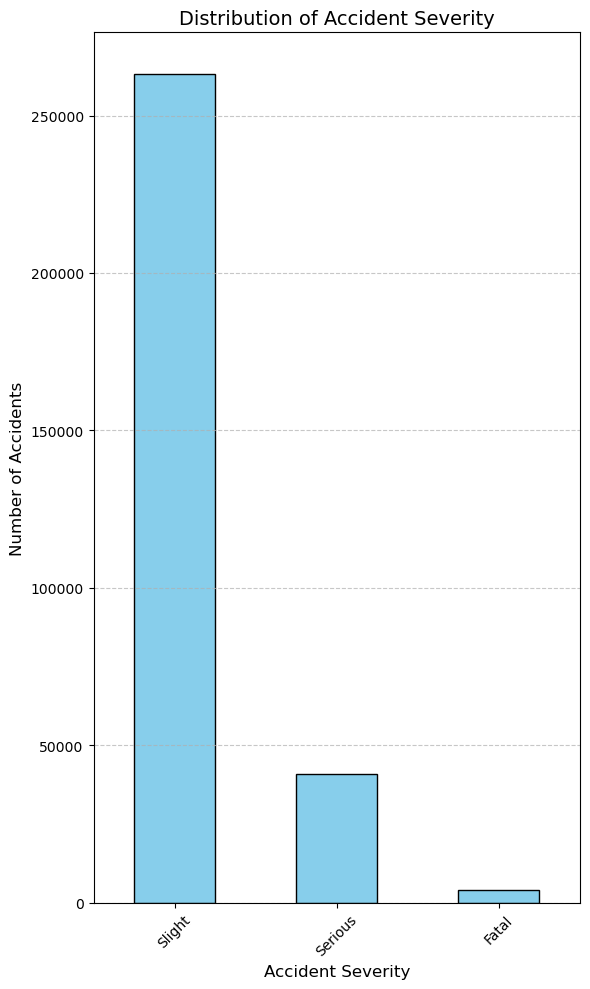

accident_severity
Slight     263280
Serious     40740
Fatal        3953
Name: count, dtype: int64

In [8]:
# Analyze the distribution of accident severity
severity_distribution = df['accident_severity'].value_counts()

# Plot the distribution
plt.figure(figsize=(6, 10))
severity_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Accident Severity', fontsize=14)
plt.xlabel('Accident Severity', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

severity_distribution

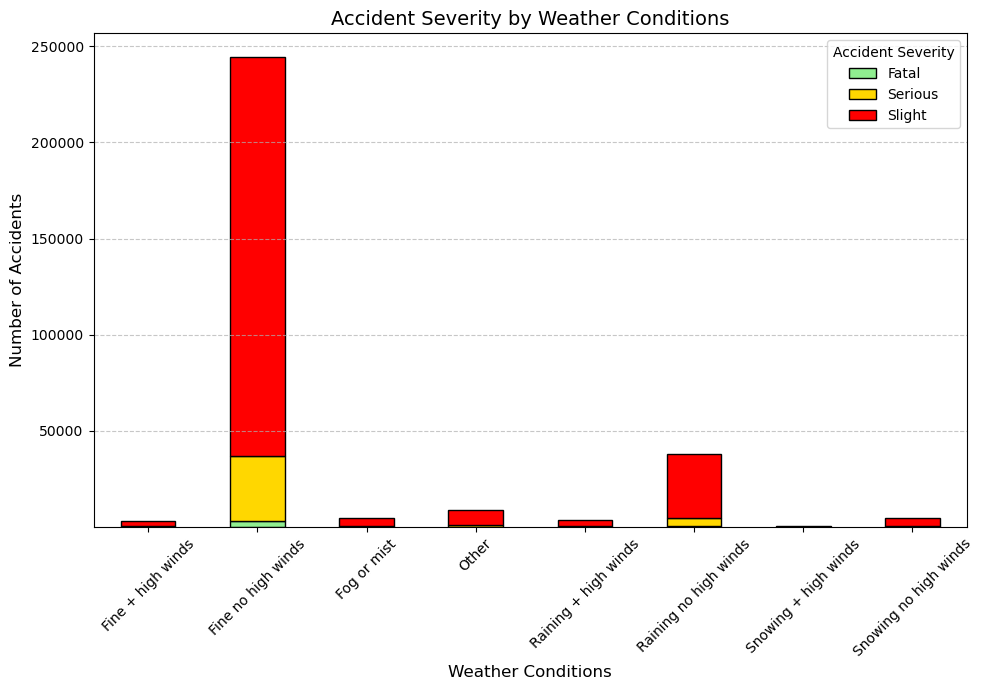

accident_severity,Fatal,Serious,Slight
weather_conditions,,,
Fine + high winds,56,431,2661
Fine no high winds,3268,33654,207574
Fog or mist,59,469,4255
Other,84,904,7814
Raining + high winds,50,440,3036
Raining no high winds,404,4363,33074
Snowing + high winds,1,61,476
Snowing no high winds,31,418,4390


In [13]:
# Analyze the relationship between weather conditions and accident severity
weather_severity = df.groupby(['weather_conditions', 'accident_severity']).size().unstack()

# Plot the data as a stacked bar chart
weather_severity.plot(kind='bar', stacked=True, figsize=(10, 7), color=['lightgreen', 'gold', 'red'], edgecolor='black')
plt.title('Accident Severity by Weather Conditions', fontsize=14)
plt.xlabel('Weather Conditions', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

weather_severity


<Axes: ylabel='Frequency'>

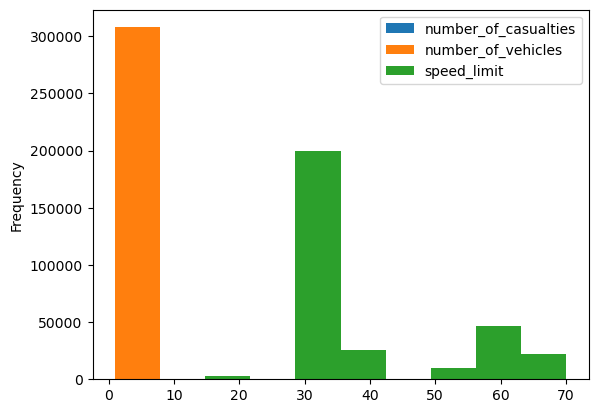

In [14]:
df.plot.hist()

In [16]:
# Calculate the average number of casualties per accident
average_casualties = df['number_of_casualties'].mean()

average_casualties


1.3568819344552931

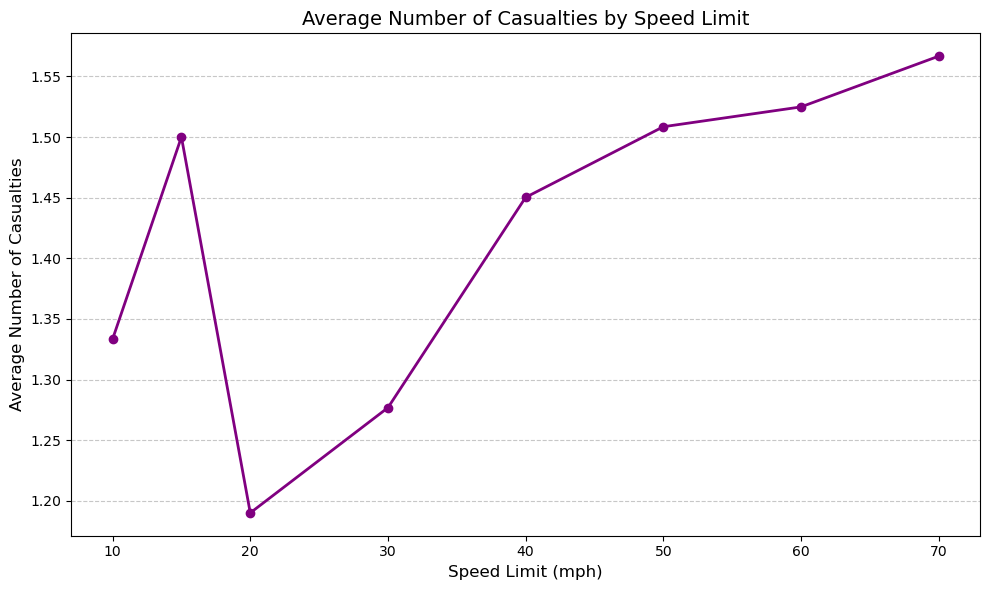

speed_limit
10    1.333333
15    1.500000
20    1.190066
30    1.276835
40    1.450253
50    1.508488
60    1.524837
70    1.566676
Name: number_of_casualties, dtype: float64

In [17]:
# Analyze the relationship between speed limits and number of casualties
speed_casualties = df.groupby('speed_limit')['number_of_casualties'].mean()

# Plot the data
plt.figure(figsize=(10, 6))
speed_casualties.plot(kind='line', marker='o', color='purple', linewidth=2)
plt.title('Average Number of Casualties by Speed Limit', fontsize=14)
plt.xlabel('Speed Limit (mph)', fontsize=12)
plt.ylabel('Average Number of Casualties', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

speed_casualties


In [19]:
# Calculate the total number of casualties
total_casualties = df['number_of_casualties'].sum()

print(f"Total casualties taken place after the accidents: {total_casualties}")


Total casualties taken place after the accidents: 417883


In [23]:
import pandas as pd

# Ensure 'accident_date' is parsed correctly
df['accident_date'] = pd.to_datetime(df['accident_date'], errors='coerce')

# Remove rows where 'accident_date' couldn't be parsed
df = df.dropna(subset=['accident_date'])

# Extract the year from the 'accident_date'
df['year'] = df['accident_date'].dt.year

# Get the current year and previous year dynamically
current_year = df['year'].max()
previous_year = current_year - 1

# Safeguards for missing data in years
if current_year not in df['year'].values or previous_year not in df['year'].values:
    print("Insufficient data to calculate Year-over-Year growth.")
else:
    # Total casualties and accidents for the current year
    current_year_casualties = df[df['year'] == current_year]['number_of_casualties'].sum()
    current_year_accidents = df[df['year'] == current_year]['accident_index'].nunique()

    # Total casualties and accidents for the previous year
    previous_year_casualties = df[df['year'] == previous_year]['number_of_casualties'].sum()
    previous_year_accidents = df[df['year'] == previous_year]['accident_index'].nunique()

    # Calculate YoY growth, handle division by zero
    if previous_year_casualties > 0:
        casualties_yoy_growth = ((current_year_casualties - previous_year_casualties) / previous_year_casualties) * 100
    else:
        casualties_yoy_growth = "N/A (No data for previous year)"

    if previous_year_accidents > 0:
        accidents_yoy_growth = ((current_year_accidents - previous_year_accidents) / previous_year_accidents) * 100
    else:
        accidents_yoy_growth = "N/A (No data for previous year)"

    # Display results
    print(f"Total Casualties in {current_year}: {current_year_casualties}")
    print(f"YoY Growth in Casualties: {casualties_yoy_growth}")
    print(f"Total Accidents in {current_year}: {current_year_accidents}")
    print(f"YoY Growth in Accidents: {accidents_yoy_growth}")


Total Casualties in 2022: 76683
YoY Growth in Casualties: -14.230588551103954
Total Accidents in 2022: 56805
YoY Growth in Accidents: -14.155534062745573


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14968\1809960381.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['accident_date'].dt.year


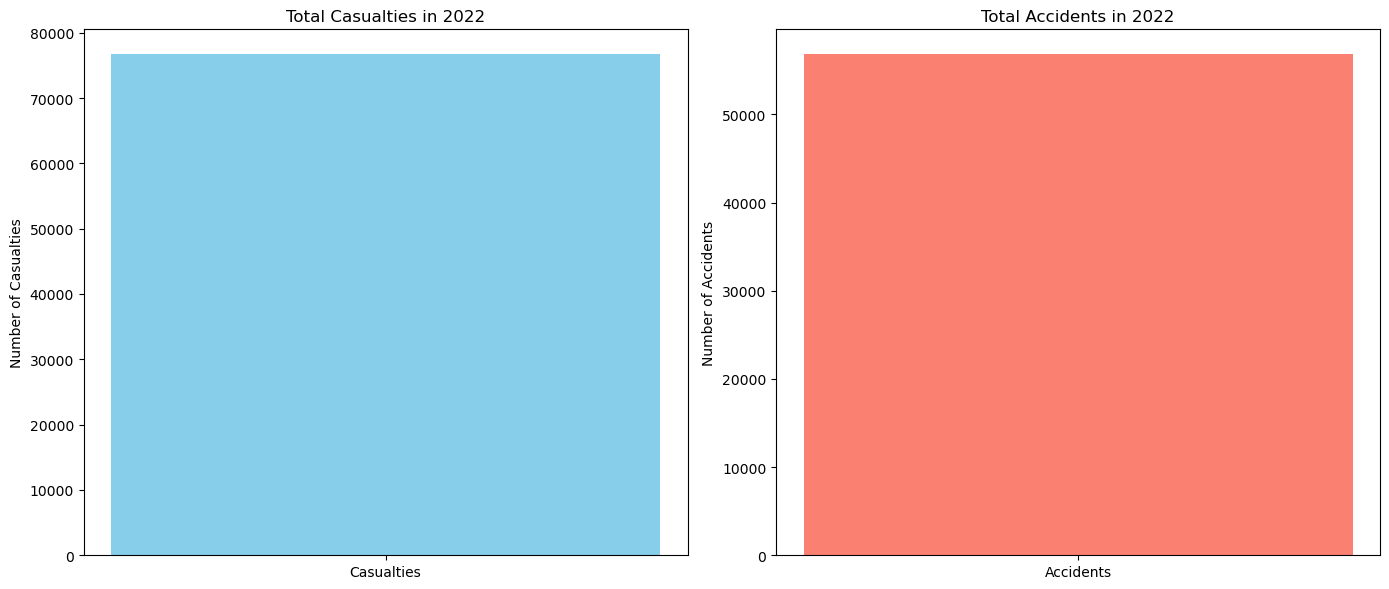

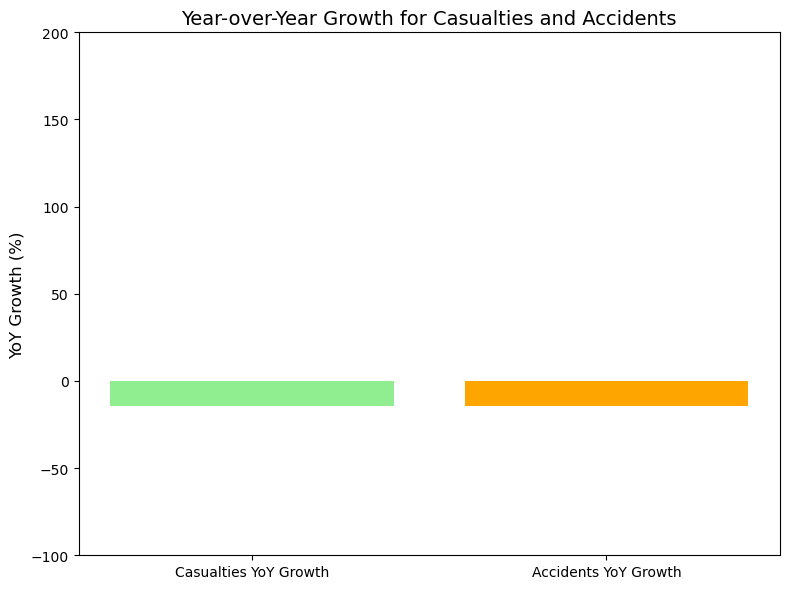

In [24]:
import matplotlib.pyplot as plt

# Plotting Total Casualties and Accidents for Current Year
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar Chart for Total Casualties
ax[0].bar(['Casualties'], [current_year_casualties], color='skyblue')
ax[0].set_title(f'Total Casualties in {current_year}')
ax[0].set_ylabel('Number of Casualties')

# Bar Chart for Total Accidents
ax[1].bar(['Accidents'], [current_year_accidents], color='salmon')
ax[1].set_title(f'Total Accidents in {current_year}')
ax[1].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

# Plotting YoY Growth in Casualties and Accidents
fig, ax = plt.subplots(figsize=(8, 6))

# YoY Growth Bar Chart
yoy_growth = [casualties_yoy_growth, accidents_yoy_growth]
yoy_labels = ['Casualties YoY Growth', 'Accidents YoY Growth']

ax.bar(yoy_labels, yoy_growth, color=['lightgreen', 'orange'])

# Set the title and labels
ax.set_title('Year-over-Year Growth for Casualties and Accidents', fontsize=14)
ax.set_ylabel('YoY Growth (%)', fontsize=12)
ax.set_ylim(-100, 200)  # Set y-axis limit to handle possible negative growth
plt.tight_layout()
plt.show()


In [ ]:
import turtle
import random

# Set up the screen
screen = turtle.Screen()
screen.bgcolor("black")

# Create a turtle for drawing
magic_turtle = turtle.Turtle()
magic_turtle.shape("turtle")
magic_turtle.color("yellow")
magic_turtle.speed(0)
magic_turtle.penup()

# Function to draw a star
def draw_star(x, y, size):
    magic_turtle.goto(x, y)
    magic_turtle.setheading(random.randint(0, 360))  # Random direction for variation
    magic_turtle.pendown()
    for i in range(5):
        magic_turtle.forward(size)
        magic_turtle.right(144)
    magic_turtle.penup()

# Create a dynamic magic effect with random stars
def magic_effect():
    while True:
        x = random.randint(-300, 300)
        y = random.randint(-300, 300)
        size = random.randint(10, 50)
        draw_star(x, y, size)
        magic_turtle.color(random.choice(["yellow", "cyan", "magenta", "white", "green"]))
        magic_turtle.speed(random.randint(1, 10))

# Start the magic effect
magic_effect()

# Keep the window open
turtle.done()


In [4]:
df

,accident_index,accident_date,day_of_week,junction_control,junction_detail,accident_severity,light_conditions,local_authority,carriageway_hazards,number_of_casualties,number_of_vehicles,police_force,road_surface_conditions,road_type,speed_limit,time,urban_or_rural_area,weather_conditions,vehicle_type
0,BS0000001,01-01-2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,BS0000002,05-01-2021,Monday,Give way or uncontrolled,Crossroads,Serious,Daylight,Kensington and Chelsea,NaN,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,04-01-2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,05-01-2021,Monday,Auto traffic signal,T or staggered junction,Serious,Daylight,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10,Urban,Other,Motorcycle over 500cc
4,BS0000005,06-01-2021,Tuesday,Auto traffic signal,Crossroads,Serious,Darkness - lights lit,Kensington and Chelsea,NaN,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,BS0307969,18-02-2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,Daylight,Highland,NaN,2,1,Northern,Dry,Single carriageway,60,07:00,Rural,Fine no high winds,Car
307969,BS0307970,21-02-2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,Darkness - no lighting,Highland,NaN,1,1,Northern,Frost or ice,Single carriageway,60,03:00,Rural,Fine no high winds,Car
307970,BS0307971,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,Daylight,Highland,NaN,1,3,Northern,Frost or ice,Single carriageway,30,09:38,Rural,Fine no high winds,Car
307971,BS0307972,23-02-2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,Darkness - no lighting,Highland,NaN,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc
